#  Loading Data

In [212]:
import numpy as np
import pandas as pd 
import seaborn as sns
import os

In [213]:
df = pd.read_csv('/kaggle/input/hotel-bokking/hotel_bookings(in).csv')

#  Exploring & Preparing Data

**Understanding the dataset**

In [214]:
df.shape

(119390, 32)

In [215]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [216]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [217]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [218]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [219]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,10/21/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [220]:
df.describe(include="object").T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


**Clean the data**

In [221]:
df.duplicated().sum()

31994

In [222]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [223]:
df['country'].value_counts()

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
DMA        1
LCA        1
CYM        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [224]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [225]:
df['agent'].value_counts()

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
433.0        1
90.0         1
480.0        1
388.0        1
216.0        1
Name: agent, Length: 333, dtype: int64

**Statistical Analysis**

In [226]:
df.groupby("hotel")["adults"].sum()

hotel
City Hotel      100249
Resort Hotel     63688
Name: adults, dtype: int64

In [227]:
df.groupby("country")["hotel"].sum()

country
ABW                                 City HotelCity Hotel
AGO    Resort HotelResort HotelResort HotelResort Hot...
AIA                                           City Hotel
ALB    Resort HotelResort HotelResort HotelCity Hotel...
AND    Resort HotelResort HotelResort HotelResort Hot...
                             ...                        
VGB                                           City Hotel
VNM    Resort HotelResort HotelCity HotelCity HotelCi...
ZAF    Resort HotelResort HotelResort HotelResort Hot...
ZMB                               Resort HotelCity Hotel
ZWE         Resort HotelResort HotelCity HotelCity Hotel
Name: hotel, Length: 177, dtype: object

**Visualisation**

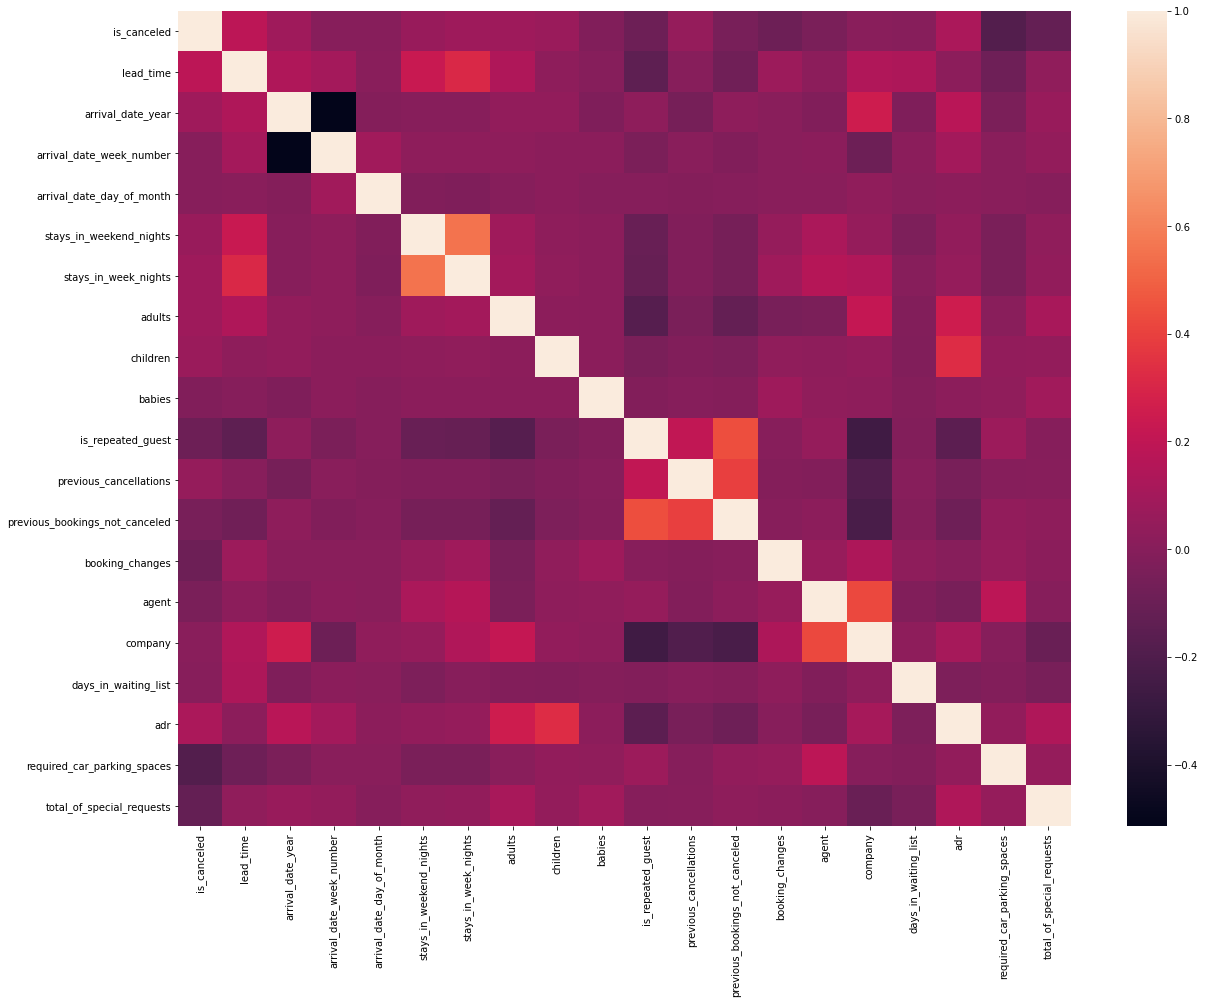

In [228]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,15))
ax = sns.heatmap(df.corr())

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.184806,0.088030,0.001443,0.005328,0.060191,0.082928,0.081816,0.067396,-0.020543,-0.089643,0.051468,-0.052154,-0.093644,-0.044359,0.009040,0.004464,0.127986,-0.184206,-0.120545
lead_time,0.184806,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028638,-0.003614,-0.147003,0.005375,-0.078931,0.077028,0.023698,0.143630,0.132152,0.023564,-0.086541,0.034240
arrival_date_year,0.088030,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041137,-0.023334,0.024343,-0.054212,0.027256,0.008604,-0.020110,0.250194,-0.027939,0.176088,-0.039807,0.064268
arrival_date_week_number,0.001443,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013456,0.014260,-0.036860,0.007199,-0.020819,0.011902,0.017685,-0.093838,0.013843,0.098279,0.008946,0.046599
arrival_date_day_of_month,0.005328,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015807,-0.000393,-0.004178,-0.008538,0.000152,0.006307,0.008830,0.031916,0.006588,0.022591,0.009167,-0.001651
stays_in_weekend_nights,0.060191,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028558,0.013668,-0.106948,-0.020636,-0.056653,0.050316,0.126838,0.050211,-0.031680,0.038972,-0.042920,0.032396
stays_in_week_nights,0.082928,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030477,0.016009,-0.113543,-0.018781,-0.058503,0.085044,0.165014,0.147486,0.001905,0.053298,-0.044303,0.037823
adults,0.081816,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023721,0.016640,-0.171714,-0.042097,-0.120914,-0.048061,-0.036651,0.216502,-0.015740,0.248999,0.007802,0.112772
children,0.067396,0.028638,0.041137,0.013456,0.015807,0.028558,0.030477,0.023721,1.000000,0.017422,-0.045654,-0.019209,-0.029425,0.031308,0.028050,0.038657,-0.020420,0.326290,0.036328,0.044606
babies,-0.020543,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017422,1.000000,-0.012977,-0.005395,-0.009193,0.081035,0.035219,0.024804,-0.006840,0.023446,0.030885,0.094820


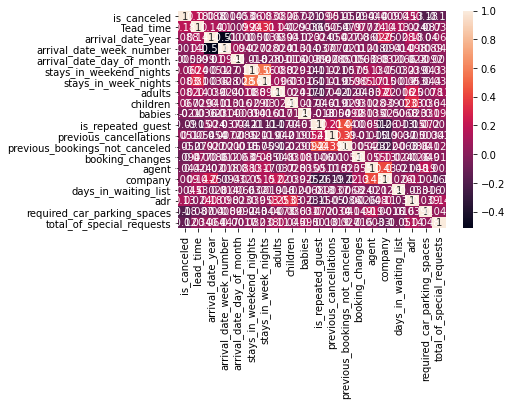

In [231]:
sns.heatmap(df.corr(),annot=True)

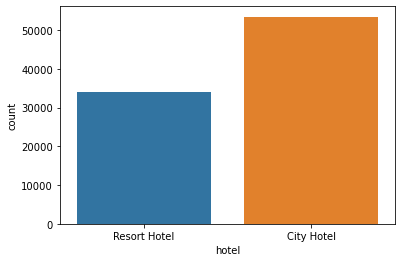

In [232]:
sns.countplot(df['hotel'])
